<a href="https://colab.research.google.com/github/kevin1109500/NEW-PRED/blob/main/parkinson's_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/parkinson.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDA,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [ ]:
df.drop('name',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDA              195 non-null    float64
 1

In [ ]:
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 195 rows , 23 columns


In [ ]:
df.isnull().sum().sort_values(ascending=False)

MDVP:Fo(Hz)         0
MDVP:APQ            0
PPE                 0
D2                  0
spread2             0
spread1             0
DFA                 0
RPDA                0
HNR                 0
NHR                 0
Shimmer:DDA         0
Shimmer:APQ5        0
MDVP:Fhi(Hz)        0
Shimmer:APQ3        0
MDVP:Shimmer(dB)    0
MDVP:Shimmer        0
Jitter:DDP          0
MDVP:PPQ            0
MDVP:RAP            0
MDVP:Jitter(Abs)    0
MDVP:Jitter(%)      0
MDVP:Flo(Hz)        0
status              0
dtype: int64

In [ ]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

MDVP:Fo(Hz)         0.0
MDVP:APQ            0.0
PPE                 0.0
D2                  0.0
spread2             0.0
spread1             0.0
DFA                 0.0
RPDA                0.0
HNR                 0.0
NHR                 0.0
Shimmer:DDA         0.0
Shimmer:APQ5        0.0
MDVP:Fhi(Hz)        0.0
Shimmer:APQ3        0.0
MDVP:Shimmer(dB)    0.0
MDVP:Shimmer        0.0
Jitter:DDP          0.0
MDVP:PPQ            0.0
MDVP:RAP            0.0
MDVP:Jitter(Abs)    0.0
MDVP:Jitter(%)      0.0
MDVP:Flo(Hz)        0.0
status              0.0
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [ ]:
df.nunique()

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDA                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64

In [ ]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDA', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

In [ ]:
cols=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDA', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']

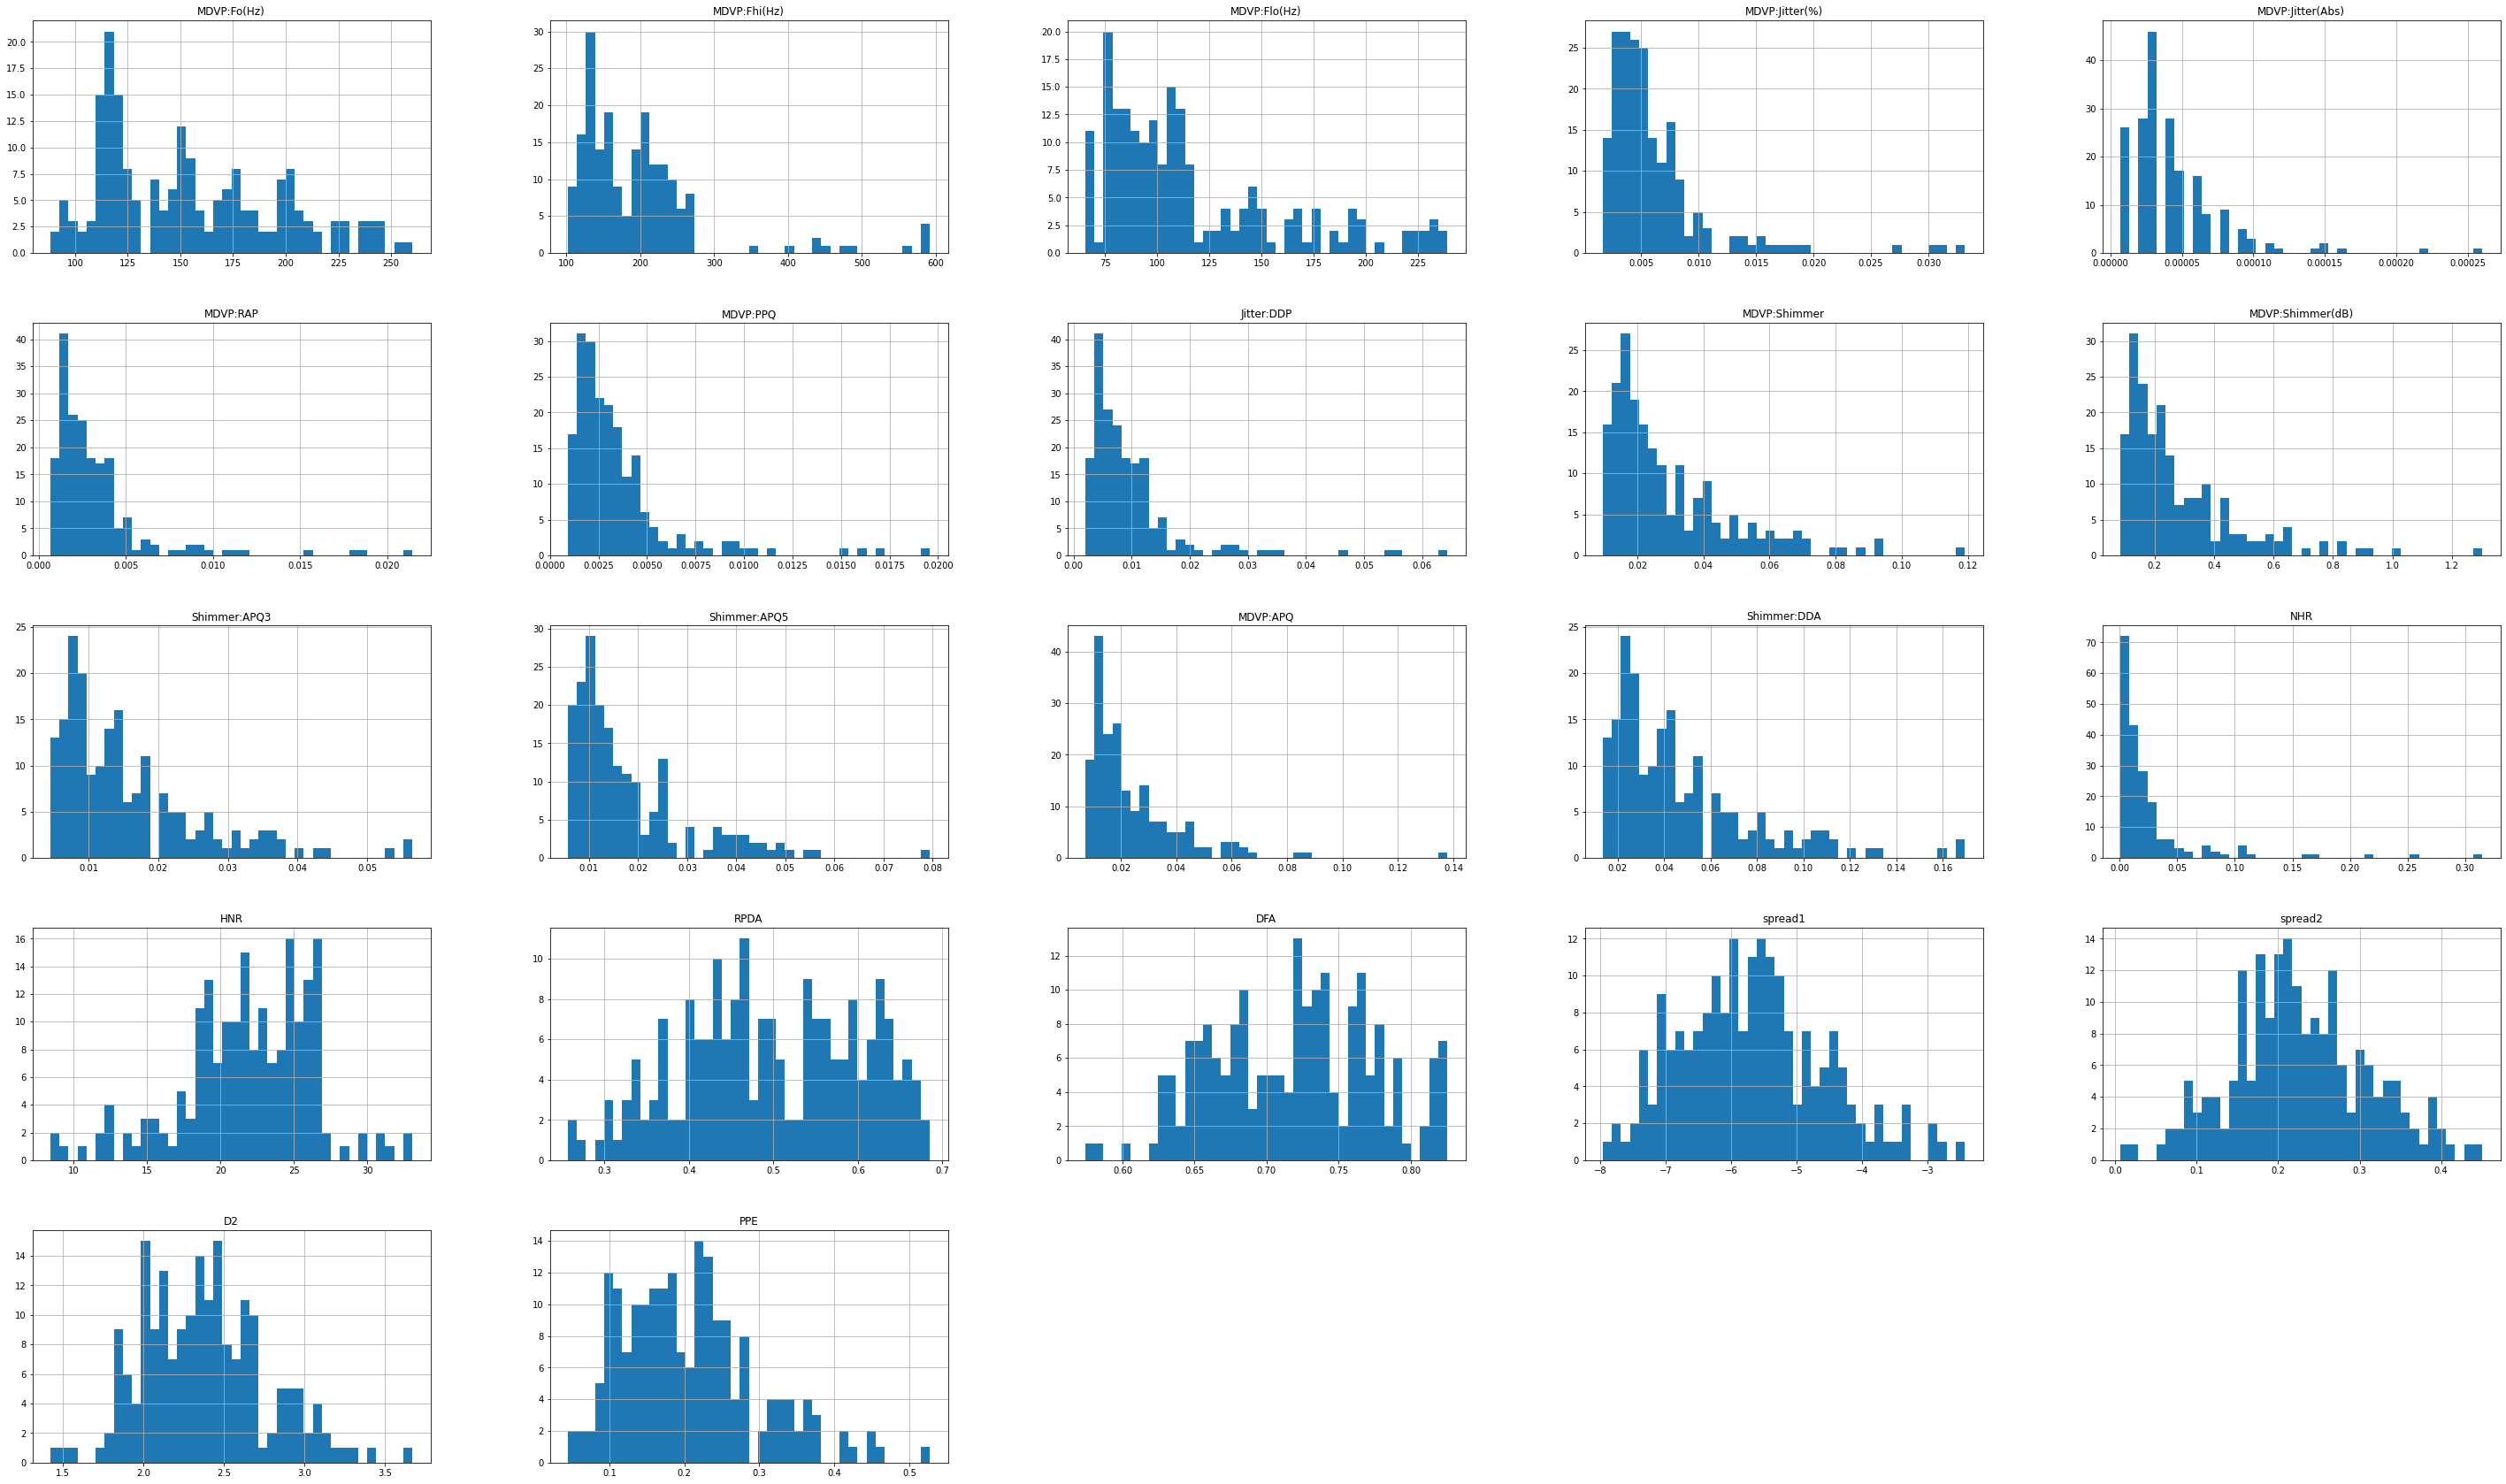

In [ ]:
df[cols].hist(bins=40,figsize=(50,30))
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

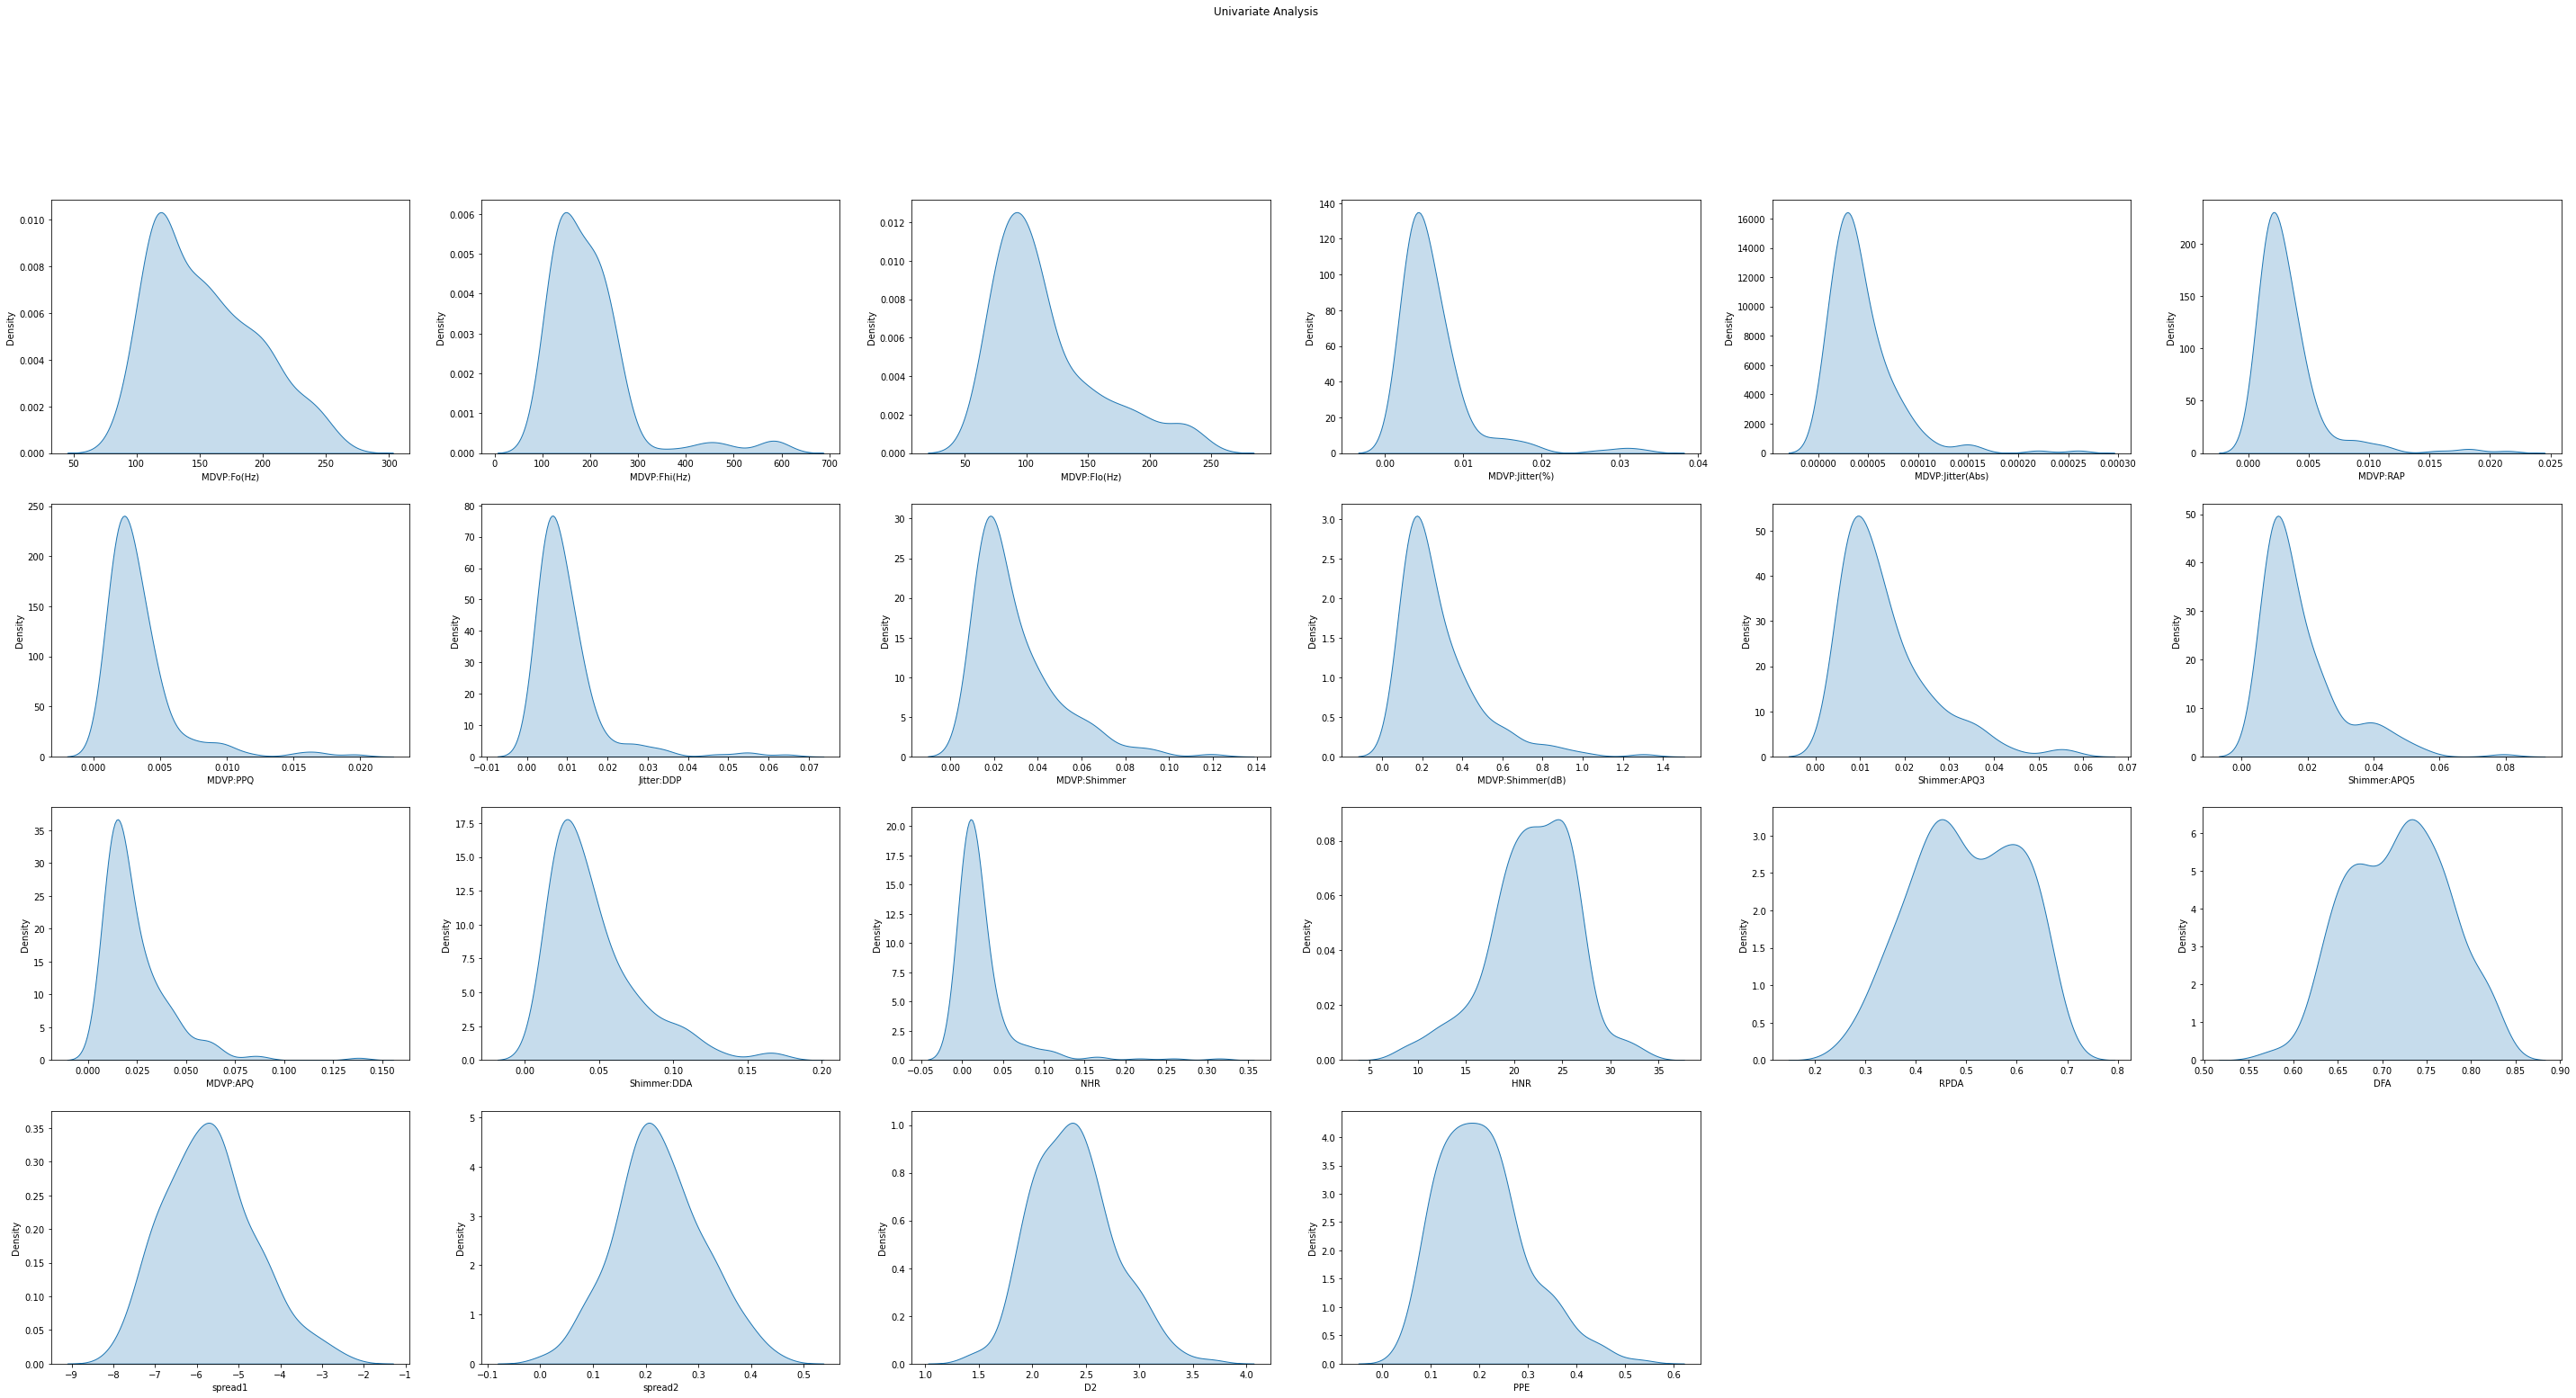

In [ ]:
plt.figure(figsize=[50,30])
plt.suptitle('Univariate Analysis')
for i in range(0,len(cols)):
  plt.subplot(5,6,i+1);
  sns.kdeplot(x=df[cols[i]],shade=True);

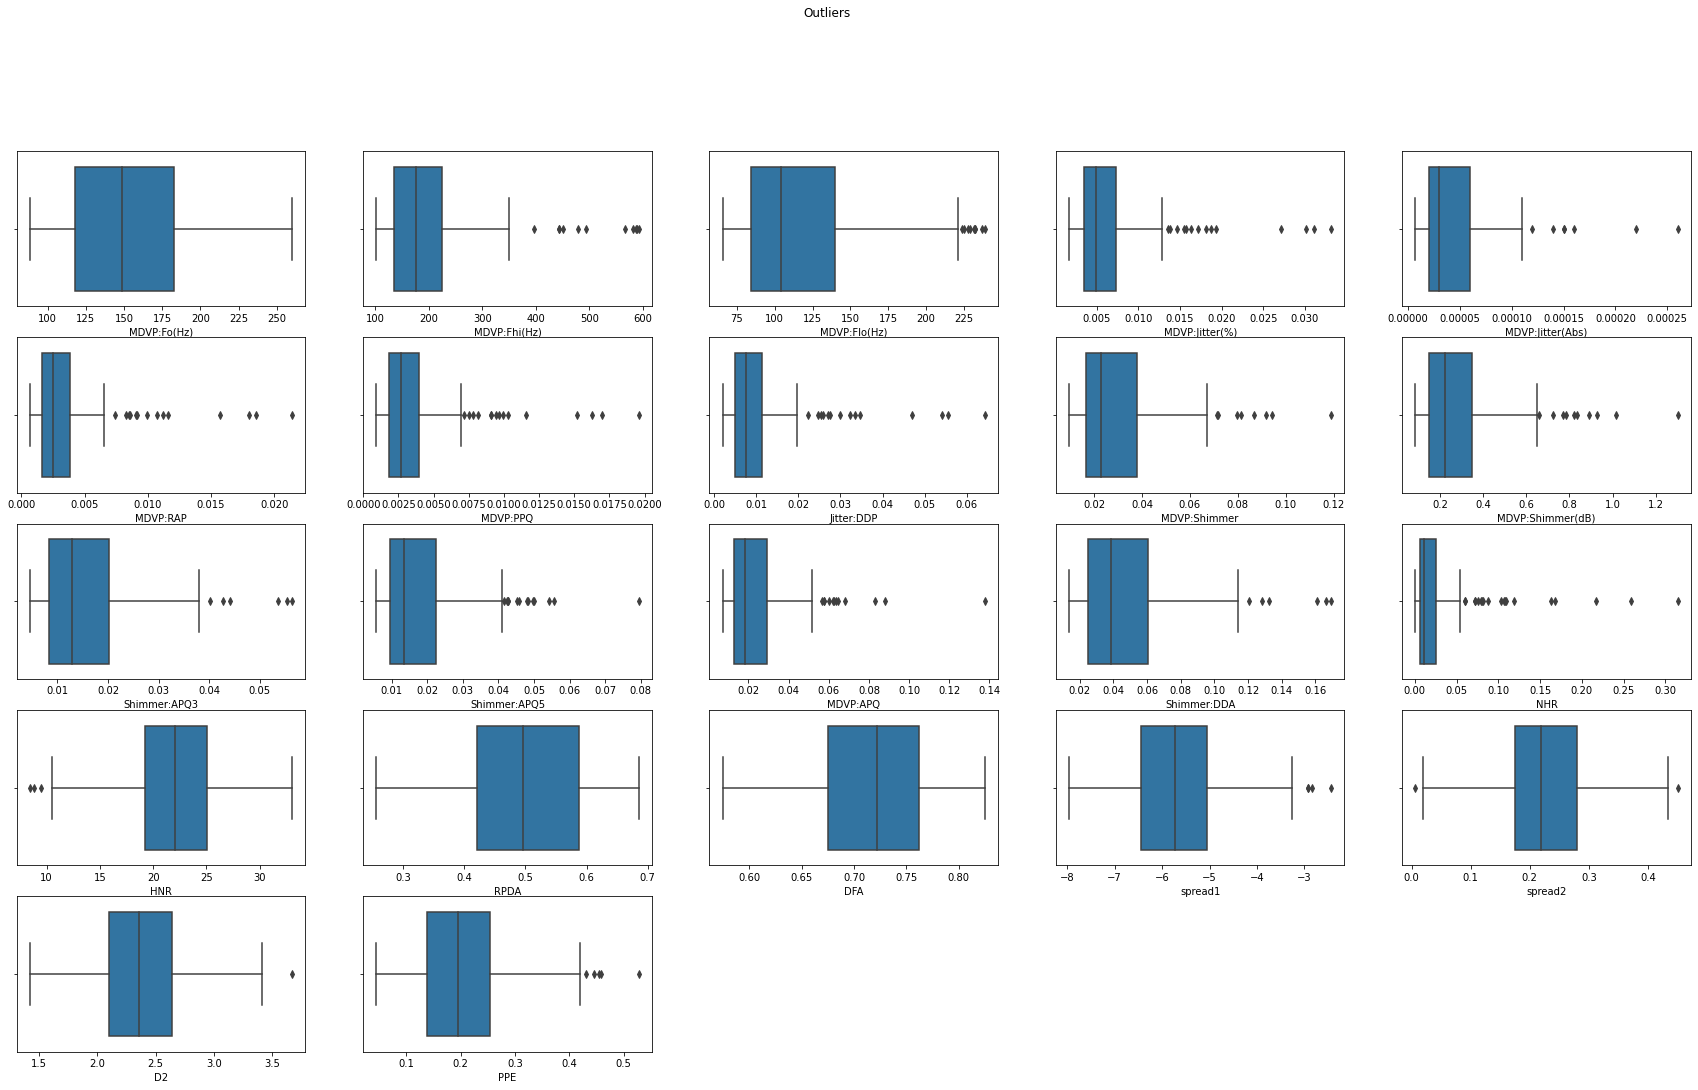

In [ ]:
plt.figure(figsize=(30,20))
plt.suptitle('Outliers')
for i in range(0,len(cols)):
  plt.subplot(6,5,i+1)
  sns.boxplot(x=df[cols[i]])

<Axes: xlabel='status', ylabel='count'>

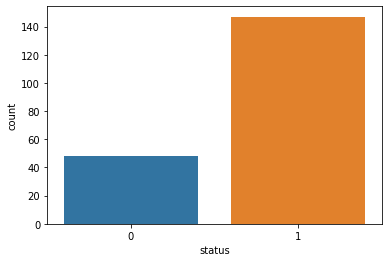

In [ ]:
sns.countplot(data=df,x='status')

In [ ]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDA,DFA,spread1,spread2,D2,PPE,status
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356,-0.383535
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543,-0.166136
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071,-0.380200
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543,0.278220
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162,0.338653
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999,0.266668
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647,0.288698
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697


<Axes: >

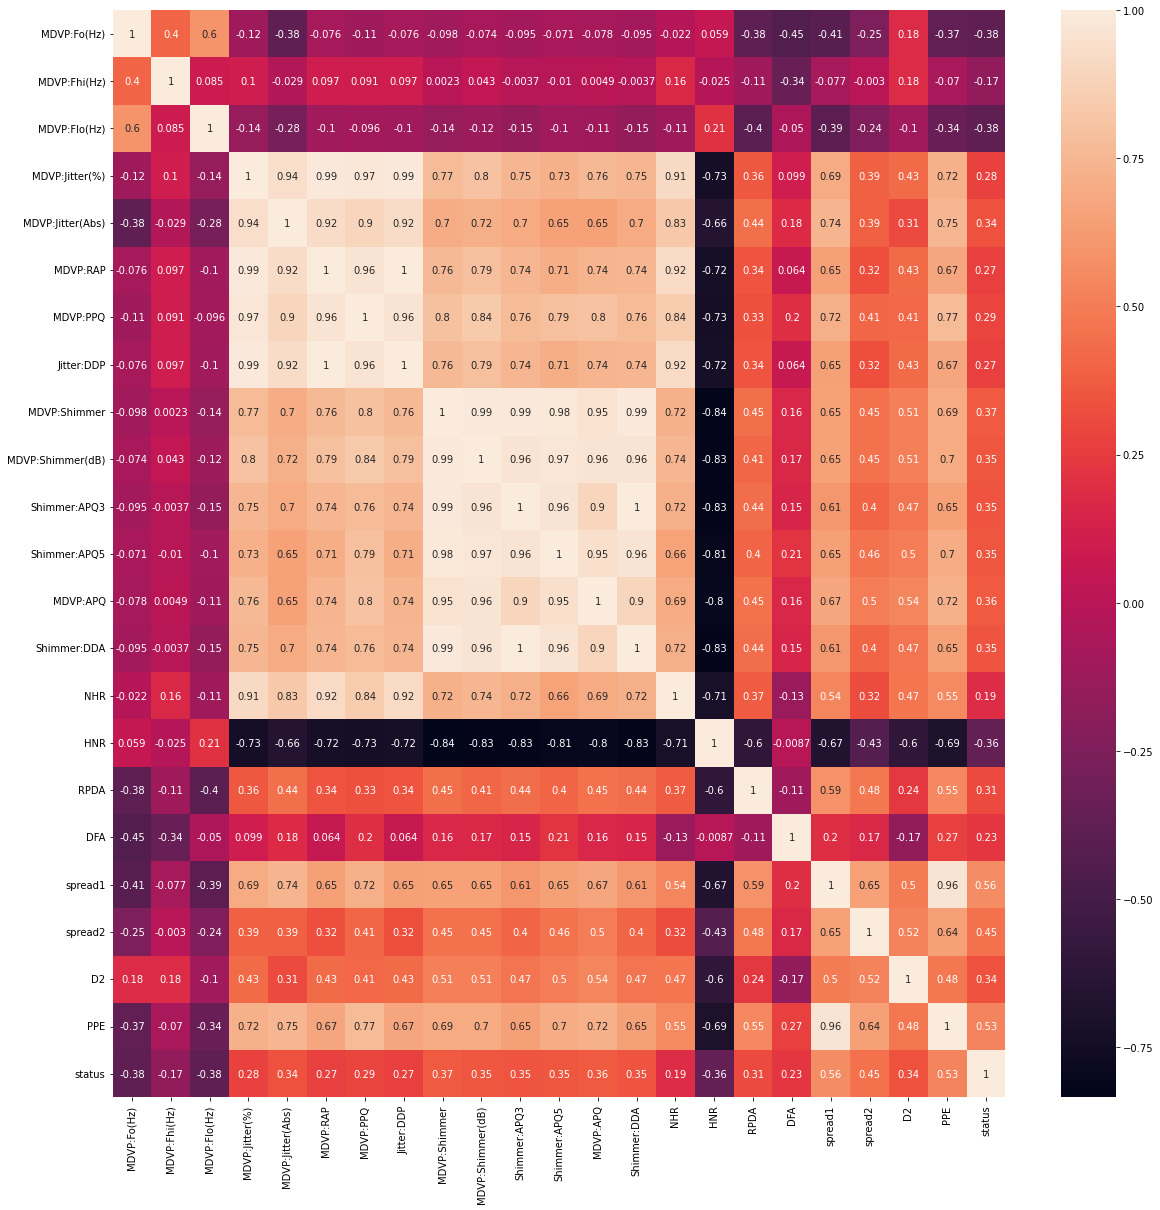

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.iloc[:,0:23].values
y=df.iloc[:,22].values

In [ ]:
from imblearn.combine import SMOTEENN
oversample = SMOTEENN()
x,y= oversample.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,train_size=0.7,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
pca.explained_variance_ratio_

array([0.63353466, 0.13502628, 0.05702933, 0.04071284, 0.02962991,
       0.02489227, 0.0214711 , 0.01566328, 0.01171678])

In [ ]:
len(x_train[0])

9

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
cv=KFold(n_splits=5,random_state=0,shuffle=True)

lrModel = LogisticRegression()
KnModel = KNeighborsClassifier()
RfModel = RandomForestClassifier()
DtModel = DecisionTreeClassifier()
SvmModel = SVC()
XgbModel = xgb.XGBClassifier()
BcModel = BaggingClassifier()
AdbModel = AdaBoostClassifier()

In [ ]:
scores = cross_val_score(lrModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(KnModel, x_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

scores = cross_val_score(DtModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(RfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(AdbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("AdaBoost Tree Average CV Score: ",scores.mean())

scores = cross_val_score(SvmModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

scores = cross_val_score(XgbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("XGBoost Average CV Score: ",scores.mean())

scores = cross_val_score(BcModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Bagging Classifier Average CV Score: ",scores.mean())

Logistics Regression Average CV Score:  1.0
KNeighbors Average CV Score:  1.0
Decision Tree Average CV Score:  0.9497983870967742
Random Forest Average CV Score:  0.98125
AdaBoost Tree Average CV Score:  0.9685483870967742
Support Vector Machine Average CV Score:  1.0
XGBoost Average CV Score:  0.9625
Bagging Classifier Average CV Score:  0.9625


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = LogisticRegression()
randomsearch = RandomizedSearchCV(logistic, hyperparameters,scoring = 'roc_auc',n_jobs = 10,cv = 5,verbose=True)
best_model_grid = randomsearch.fit(x_train, y_train)
best_model_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LogisticRegression(C=1291.5496650148827, solver='saga')

In [ ]:
lrRmodel=LogisticRegression(C=2.7825594022071245, penalty='l1', solver='saga')
lrRmodel.fit(x_train,y_train)
y_pred=lrRmodel.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[36  0]
 [ 0 32]]


<Axes: >

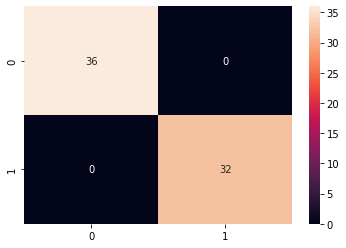

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
print("precision score =",precision_score(y_test,y_pred))
print("recall score =",recall_score(y_test,y_pred))
print("F1 score =",f1_score(y_test,y_pred))
print("Accuracy score =",accuracy_score(y_test,y_pred))

precision score = 1.0
recall score = 1.0
F1 score = 1.0
Accuracy score = 1.0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        32

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

